In [101]:
import pandas as pd
import cufflinks as cf
from plotly.offline import plot, iplot
import numpy as np
import plotly.graph_objs as go
import plotly.io as pio 
import cufflinks as cf
cf.go_offline()
import plotly 
import plotly.graph_objs as go
import plotly.offline as py
import chart_studio.plotly as pyo
from datetime import datetime
from sklearn import svm
import matplotlib.pyplot as plt
#import de clusterizaçao
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

#import de regreçao
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

#import de seleçao de modelos 
from sklearn.model_selection import train_test_split

#importes de pre processamneto
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn import datasets
from sklearn import metrics

In [2]:
!pip install cufflinks
!pip install plotly

<h1>manipulação e tratamento<h1\\>

In [3]:
#fazend a leitura do arquivo csv com o dataset limpo para virar nosso df 

dataset = pd.read_csv("pedido_limpo.csv", sep=',')
df=dataset

In [4]:
#exibindo as informações gerais do dataset
df

,id,id_caixa,status,data,fechamento,id_cliente,id_mesa,id_usuario,subtotal,taxa,desconto,total,valor_recebido,last_update,pedido_number,id_usuario_cancelamento,id_entregador,troco_para
0,1,1,FECHADO,2016-09-08 14:54:56,2016-09-08 20:44:22,1,1,1,33,0,0,33,50,2018-07-03 16:40:52,1,0,0,0
1,2,1,FECHADO,2016-09-08 18:11:17,2016-09-08 20:45:16,1,2,1,"17,99",0,0,"17,99",20,2018-07-03 16:40:52,2,0,0,0
2,3,1,FECHADO,2016-09-08 18:43:14,2016-09-08 20:46:19,1,3,1,"23,97",0,0,"23,97",30,2018-07-03 16:40:52,3,0,0,0
3,4,1,FECHADO,2016-09-08 20:46:44,2016-09-08 20:58:17,1,1,1,"17,98",0,0,"17,98",18,2018-07-03 16:40:52,4,0,0,0
4,5,1,FECHADO,2016-09-08 20:48:55,2016-09-08 21:03:01,1,2,1,"41,97",0,0,"41,97",52,2018-07-03 16:40:52,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99997,573,FECHADO,2018-01-03 22:22:51,2018-01-04 00:58:06,1,46,21,"9,49",0,"9,49",0,0,2018-07-03 16:40:52,122,0,0,0
99996,99998,573,FECHADO,2018-01-03 22:23:52,2018-01-03 22:59:24,1,8,18,"75,93",0,0,"75,93","75,93",2018-07-03 16:40:52,123,0,0,0
99997,99999,573,FECHADO,2018-01-03 22:24:51,2018-01-04 00:35:43,13067,0,11,"47,47",0,0,"47,47","47,47",2018-07-03 16:40:52,124,0,1,0
99998,100000,573,FECHADO,2018-01-03 22:30:45,2018-01-04 00:23:06,3176,0,1,"39,47",0,0,"39,47",50,2018-07-03 16:40:52,125,0,1,50


In [5]:
#fazendo uma padronização basica dos dados da coluna subtotal

# esse primeiro serve para converter todas a virgulas em pontos as vezes ele da erro dependendo de como o dataset foi gerado e so descomentar ou comentar
df['subtotal'] = df['subtotal'].str.replace(',', '.')
#fazendo uma conversao para todos da coluna subtotal ficar em float
df['subtotal'] = df['subtotal'].astype(float).round(2)

# Imprime o DataFrame atualizado
print(df['subtotal'])

0        33.00
1        17.99
2        23.97
3        17.98
4        41.97
         ...  
99995     9.49
99996    75.93
99997    47.47
99998    39.47
99999    14.49
Name: subtotal, Length: 100000, dtype: float64


In [7]:
# converteno a coluna data para o tipo datetime pra ficar mais tranquilo de trabalhar
df['data'] = pd.to_datetime(df['data'])

In [8]:
#criando uma nova coluna chamada ano para em um proximo momento agrupar os valores por ano 

# Extrai apenas o ano da coluna 'data' e gera uma nova coluna chamada ano 
df['ano'] = df['data'].dt.strftime('%Y')

In [93]:
#criando uma nova coluna chamada dia para em um proximo momento agrupar ou manipular os valores por dia
df['dia'] = df['data'].dt.day

In [9]:
#testando nova coluna
df['ano']

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
99995    2018
99996    2018
99997    2018
99998    2018
99999    2018
Name: ano, Length: 100000, dtype: object

In [21]:
#criando um df especifico para ver os dados agrupados por anos
df_agrupado_por_ano = df.groupby('ano').sum()
df_agrupado_por_ano

C:\Users\alyss\AppData\Local\Temp\ipykernel_8344\1544490520.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,id,id_caixa,id_cliente,id_mesa,id_usuario,subtotal,taxa,pedido_number,id_usuario_cancelamento,id_entregador
ano,,,,,,,,,,
2016,51177523,586153,994094,76034,14695,338005.65,0,602256,42,2015
2017,4901281623,38061517,171494634,1159889,990851,2846068.57,0,10197335,15740,32038
2018,47686475,327370,1914422,5801,7309,15756.19,0,35574,75,196


não foi possivel calcular o tiket medio por cliente por limitações na base de dados 

In [ ]:
# a explicação é que cada venda feita e separada por um id diferente e pelo que eu acho o id numero '1' foi usado varias vezes por isso o valor alto na coluna subtotal

df_id_clientes = df.groupby('id_cliente')

soma_por_clientes = df_id_clientes.sum()

soma_por_clientes

<h1>normalização e padronização de alguns dados<h1\>

In [27]:
#fazendo a normalizaçao dos dados da coluna subtotal do df principal
scaler = StandardScaler()
valor_padronizado_df_pincipal = scaler.fit_transform(df["subtotal"].values.reshape(-1,1))

#adicionando esses valores em uma nova coluna no data frame

df["valores_padronizados"] = valor_padronizado_df_pincipal

#verificando a nova coluna

df["valores_padronizados"]

0        0.050656
1       -0.708406
2       -0.405995
3       -0.708912
4        0.504273
           ...   
99995   -1.138255
99996    2.221645
99997    0.782410
99998    0.377847
99999   -0.885403
Name: valores_padronizados, Length: 100000, dtype: float64

<h1>fazendo a separação dos dados por meses dos anos<h1\>

In [94]:
#criando df para cada ano pra fica mais simples de manipular
df['ano'] = pd.to_datetime(df['ano'])

# Especifique o ano desejado
ano_2017 = 2017
ano_2018 = 2018
ano_2016 = 2016

# Filtra as linhas com o ano desejado
df_2017 = df[df['ano'].dt.year == ano_2017]
df_2018 = df[df['ano'].dt.year == ano_2018]
df_2016 = df[df['ano'].dt.year == ano_2016]

In [95]:
#criando uma coluna chamada mes com os respequitivos meses da coluna data
df_2016['mes'] = df_2016['data'].dt.month
df_2017['mes'] = df_2017['data'].dt.month
df_2018['mes'] = df_2018['data'].dt.month

In [96]:
dados_por_mes_2016 = df_2016.groupby('mes')
dados_por_mes_2017 = df_2017.groupby('mes')
dados_por_mes_2018 = df_2018.groupby('mes')

In [97]:
#criando as celulas do df sepadas po mes

#               2016

# no ano de 2016 temos dados a partir do mes 9
mes_09_2016 = dados_por_mes_2016.get_group(9)
mes_10_2016 = dados_por_mes_2016.get_group(10)
mes_11_2016 = dados_por_mes_2016.get_group(11)
mes_12_2016 = dados_por_mes_2016.get_group(12)

#               2017
# no ano de 2017 temos todos os meses do ano
mes_01_2017 = dados_por_mes_2017.get_group(1)
mes_02_2017 = dados_por_mes_2017.get_group(2)
mes_03_2017 = dados_por_mes_2017.get_group(3)
mes_04_2017 = dados_por_mes_2017.get_group(4)
mes_05_2017 = dados_por_mes_2017.get_group(5)
mes_06_2017 = dados_por_mes_2017.get_group(6)
mes_07_2017 = dados_por_mes_2017.get_group(7)
mes_08_2017 = dados_por_mes_2017.get_group(8)
mes_09_2017 = dados_por_mes_2017.get_group(9)
mes_10_2017 = dados_por_mes_2017.get_group(10)
mes_11_2017 = dados_por_mes_2017.get_group(11)
mes_12_2017 = dados_por_mes_2017.get_group(12)

#              2018
# no ano de 2018 temos apenas o mes de janeiro disponivel
mes_01_2018 = dados_por_mes_2018.get_group(1)

In [66]:
#fazendo a consulta desses datas basta apenas des-comentar algum

# mes_09_2016
# mes_10_2016
# mes_11_2016
# mes_12_2016

# mes_01_2017
# mes_02_2017
# mes_03_2017
# mes_04_2017
# mes_05_2017
# mes_06_2017
# mes_07_2017
# mes_08_2017
# mes_09_2017
# mes_10_2017
# mes_11_2017
# mes_12_2017

# mes_01_2018


<h1>regressao linear<h1\>

In [67]:
# Criar um modelo de regressão linear
modelo = LinearRegression()

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Definir as variáveis independentes e dependentes
X = mes_09_2016['dia'].values.reshape(-1, 1)  # Coluna de data como variável independente
y = mes_09_2016['subtotal']                    # Coluna de subtotal como variável dependente

# Ajustar o modelo aos dados
modelo.fit(X, y)

# Realizar previsões
y_pred = modelo.predict(X)

# Imprimir os resultados
print("Coeficiente:", modelo.coef_[0])
print("Interceptação:", modelo.intercept_)
print("MSE:", mean_squared_error(y, y_pred))

Coeficiente: 0.039394987536805474
Interceptação: 28.794277982580734
MSE: 375.60917950750866


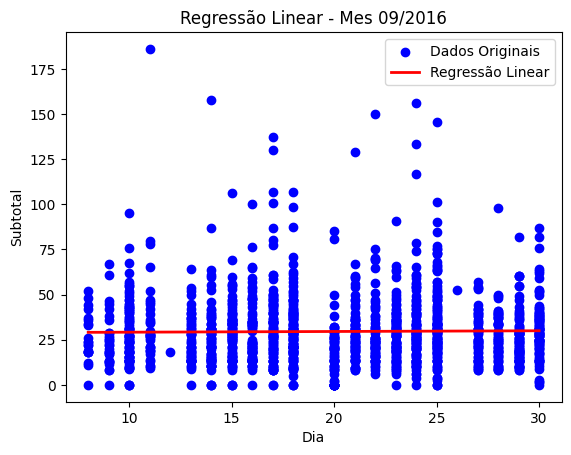

In [102]:
# Plotar o gráfico de dispersão dos dados originais
plt.scatter(X, y, color='blue', label='Dados Originais')

# Plotar a linha da regressão
plt.plot(X, y_pred, color='red', linewidth=2, label='Regressão Linear')

# Definir rótulos e título do gráfico
plt.xlabel('Dia')
plt.ylabel('Subtotal')
plt.title('Regressão Linear - Mes 09/2016')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()